# OOP polymorphism

In [10]:
# example with python built-in

print(f"{len([1,23,4])=}")
print(f"{len('1234')=}")

len([1,23,4])=3
len('1234')=4


# polymorphism in class method

In [11]:
class Fish:
    def __init__(self,name) -> None:
        self.name = name

    # overrided dunder string method

    def __str__(self):
        return f"I am a fish with name {self.name}"

    # overrided dunder reper method

    def __repr__(self) -> str:
        return f"Fish(name ='{self.name}')"

    def speak(self):
        print("Bluppy bluppy")

class Fox:
    def __init__(self, name) -> None:
        self.name = name

    def __str__(self) -> str:
        return f"I am a fox with name {self.name}, my sound is mysterious "

    def speak(self):
        return NotImplemented


In [12]:
fish1 = Fish("Guppie")
print(fish1)
repr(fish1)
    

I am a fish with name Guppie


"Fish(name ='Guppie')"

In [13]:
fox1 = Fox("Ylvis")
animals = (fish1, fox1)

for animal in animals:
    print(animal)
    animal.speak()

I am a fish with name Guppie
Bluppy bluppy
I am a fox with name Ylvis, my sound is mysterious 


In [14]:
class Rabbit:
    pass


Rabbit()


## operator overloading

 - Binary operators 

  Operator	Magic Method        
  - +	__add__(self, other)
  - –	__sub__(self, other)
  - *	__mul__(self, other)
  - /	__truediv__(self, other)
  - //	__floordiv__(self, other)
  - %	__mod__(self, other)
  - **	__pow__(self, other)
  - >>	__rshift__(self, other)
  - <<	__lshift__(self, other)
  - &	__and__(self, other)
  - |	__or__(self, other)
  - ^	__xor__(self, other)

- Comparison Operators:

  Operator	Magic Method
- <	__lt__(self, other)
- >	__gt__(self, other)
- <=	__le__(self, other)
- >=	__ge__(self, other)
- ==	__eq__(self, other)
- !=	__ne__(self, other)

- Assignment Operators:

  Operator	Magic Method
 -  -=	__isub__(self, other)
 -  +=	__iadd__(self, other)
 -  *=	__imul__(self, other)
 -  /=	__idiv__(self, other)
 -  //=	__ifloordiv__(self, other)
 -  %=	__imod__(self, other)
 -  **=	__ipow__(self, other)
 -  >>=	__irshift__(self, other)
 -  <<=	__ilshift__(self, other)
  - &=	__iand__(self, other)
  - |=	__ior__(self, other)
  - ^=	__ixor__(self, other)

- Unary Operators:

  Operator	Magic Method
 -  –	__neg__(self)
 -  +	__pos__(self)
 -  ~	__invert__(self)

In [15]:
class Vector:
    """A class to represent Euclidean vector with magnitude and direction"""

help(Vector)

Help on class Vector in module __main__:

class Vector(builtins.object)
 |  A class to represent Euclidean vector with magnitude and direction
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [32]:
from __future__ import annotations

import matplotlib.pyplot as plt

class Vector:

    """A class to represent Euclidean vector with magnitude and direction"""

   # *numbers -> arbitary numbers of positional arguments
    def __init__(self, *numbers: float | int) -> None:

        # validation
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not valid number")
        
        if len(numbers) <= 0:
            raise ValueError("Vectors can't be empty")
        
        self._numbers = tuple(float(number) for number in numbers)
    

    @property
    def numbers(self) -> tuple:
        """Returns numbers"""
        return self._numbers # tuple

    # operator overlaod + 
    def __add__(self, other: Vector) -> Vector:

        if self.validate_vectors(other):


        # (1,2)+(2,3) -> numbers = (1+2, 2+3)
            numbers = (a+b for a,b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    # operator overload -
    def __sub__(self, other: Vector) -> Vector:
        
        if self.validate_vectors(other):

        
            numbers = (a-b for a,b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def validate_vectors(self, other: Vector) -> bool:
        """Validates if two vectors have same length""" 
        if not isinstance(other, Vector) or len(other) != len(self):
            raise TypeError("Both must be Vector and must have same lenght")
        return len(self) == len(other) # evaluates to either True or False

    # to use len()on vector we have overload it
    def __len__(self) -> int:
        """Return number of elements in a Vector not the length of the Vector"""
        return len(self.numbers)

    # operator overload [] operator - __getitem__()   
    def __getitem__(self, item:int) -> float:
        return self.numbers[item]

      # overload abs() function
    def __abs__(self) -> float:
        """Returns Euclidean 2nd norm of a vector"""
        return sum(a**2 for a in self.numbers)**.5


    # overload * operator 
    def __mul__(self, value: float) -> Vector:
        print("__mul__ called")
        if not isinstance(value, (int, float)):
            raise TypeError(f"The value must be a scalar that is int or float, not {type(value)}")
        numbers = (value*a for a in self.numbers)
        return Vector(*numbers)

    def __rmul__(self, value: float) -> Vector:
        print("__rmul__ called")
        return self*value


    def plot(self, *others: "Vector") -> None:
        """ Visualize 2D vectors"""
        X, Y = [], []

        for vector in tuple(others):
            if Vector.is2D(vector) and Vector.is2D(self):
                X.append(vector[0])
                Y.append(vector[1])
        
        X.append(self[0])
        Y.append(self[1])

        originX = originY = tuple(0 for _ in range(len(X)))

        plt.quiver(originX, originY, X, Y, scale=1,
                   scale_units="xy", angles="xy")
        plt.xlim(-2, 10)
        plt.ylim(-2, 10)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"{self}, {others}")
        plt.grid()
        plt.show()
    @staticmethod
    def is2D(vector: Vector) -> bool:
        return len(vector) == 2

    def __repr__(self) -> str:
        return f" Vector{self._numbers}"
        


#Vector("ofs",2,3)
v1 = Vector(1,2,3)
print(v1)

try:
    v2 = Vector()
except ValueError as err:
    print(err)

v2 = Vector(-1,-2)
print(v2.numbers)
v3 = Vector(2,3)

print(f"{len(v3)=}")
print(f"{v3[0]=}")
print(f"{abs(Vector(3,4))=}")



 Vector(1.0, 2.0, 3.0)
Vectors can't be empty
(-1.0, -2.0)
len(v3)=2
v3[0]=2.0
abs(Vector(3,4))=5.0


In [29]:
Vector(1,2)*5



__mul__ called


 Vector(5.0, 10.0)

In [31]:
5*Vector(1,2)

__rmul__ called
__mul__ called


 Vector(5.0, 10.0)

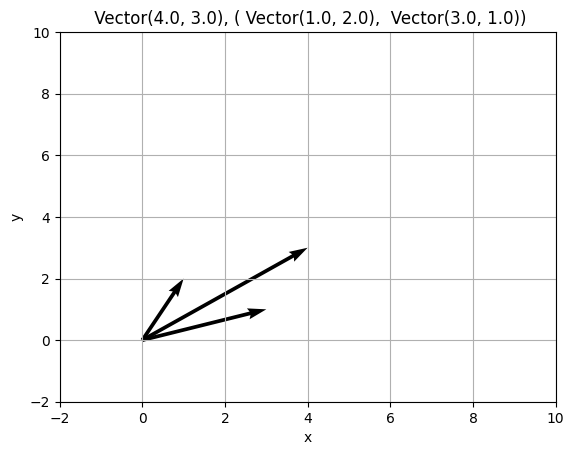

In [35]:
v1 = Vector(1,2)
v2 = Vector(3,1)
v3 = v1+v2
v3.plot(v1, v2)

In [23]:
print(f"{v2=}, {v3=}")


v2+v3
print(f"{v2=}, {v3=}")

print(v2.__add__(v3))
v3+v2

v2= Vector(-1.0, -2.0), v3= Vector(2.0, 3.0)
v2= Vector(-1.0, -2.0), v3= Vector(2.0, 3.0)
 Vector(1.0, 1.0)


 Vector(1.0, 1.0)

In [18]:
v2-v3

 Vector(-3.0, -5.0)

In [19]:
v2+Vector(1,2,3)

TypeError: Both must be Vector and must have same lenght

In [ ]:
gen = (i for i in range(10))
print(gen)
Vector(*gen)

<generator object <genexpr> at 0x0000024FD14B7190>


 Vector(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0)

In [21]:
def f(x1,x2,x3):
    print(x1,x2,x3)
f(1,2,3)

try:
    f([1,2,3])
except TypeError as err:
    print(err)

f(*[1,2,3])
f(*["hej",Vector(1,2),-5])
f("hej",Vector(1,2), -5)

f(*[*["hej", "då"],Vector(1,2)])



1 2 3
f() missing 2 required positional arguments: 'x2' and 'x3'
1 2 3
hej  Vector(1.0, 2.0) -5
hej  Vector(1.0, 2.0) -5
hej då  Vector(1.0, 2.0)


In [ ]:
isinstance(fish1, Fish), isinstance(fish1, Fox)

(True, False)

In [ ]:
Vector(1,2)+Vector(1,2,3)

TypeError: Both must be Vector and must have same lenght

In [ ]:
import math
class Circle:
    def __init__(self, radie) -> None:
        self.radie = radie
    @property
    def area(self):
        return math.pi*self.radie**2
c = Circle(1)
c.area

3.141592653589793